<a href="https://colab.research.google.com/github/alexiej/laboratory/blob/master/0_5_3_DataFrame_DASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dask

source: https://towardsdatascience.com/are-you-still-using-pandas-for-big-data-12788018ba1a

In [0]:
import numpy as np
import pandas as pd

## Generate dataset

In [2]:
%%time
from sklearn.datasets import make_classification
import pandas as pd
for i in range(1, 11):
    print('Generating trainset %d' % i)
    x, y = make_classification(n_samples=100_000, n_features=100)
    df = pd.DataFrame(data=x)
    df['y'] = y
    df.to_csv('trainset_%d.csv' % i, index=False)

Generating trainset 1
Generating trainset 2
Generating trainset 3
Generating trainset 4
Generating trainset 5
Generating trainset 6
Generating trainset 7
Generating trainset 8
Generating trainset 9
Generating trainset 10
CPU times: user 2min 55s, sys: 4.15 s, total: 2min 59s
Wall time: 2min 58s


## Panads check

In [3]:
%%time
import glob
df_list = []
for filename in glob.glob('trainset_*.csv'):
    df_ = pd.read_csv(filename)
    df_list.append(df_)
df = pd.concat(df_list)
df.shape

CPU times: user 21.4 s, sys: 959 ms, total: 22.4 s
Wall time: 22.4 s


## Dask check

https://dask.org/

In [5]:
%%time

import dask.dataframe as dd
df = dd.read_csv('trainset_*.csv')

CPU times: user 334 ms, sys: 22 ms, total: 356 ms
Wall time: 453 ms


In [16]:
(df['1']+df['5']).head()

0    0.890879
1   -0.924878
2    0.529995
3   -2.506230
4    0.640993
dtype: float64

In [7]:
%%time

# Arrays implement the Numpy API
import dask.array as da
x = da.random.random(size=(10000, 10000),
                     chunks=(1000, 1000))
x + x.T - x.mean(axis=0)

CPU times: user 8.74 ms, sys: 1.02 ms, total: 9.76 ms
Wall time: 12 ms


In [8]:
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

## Dask visualise

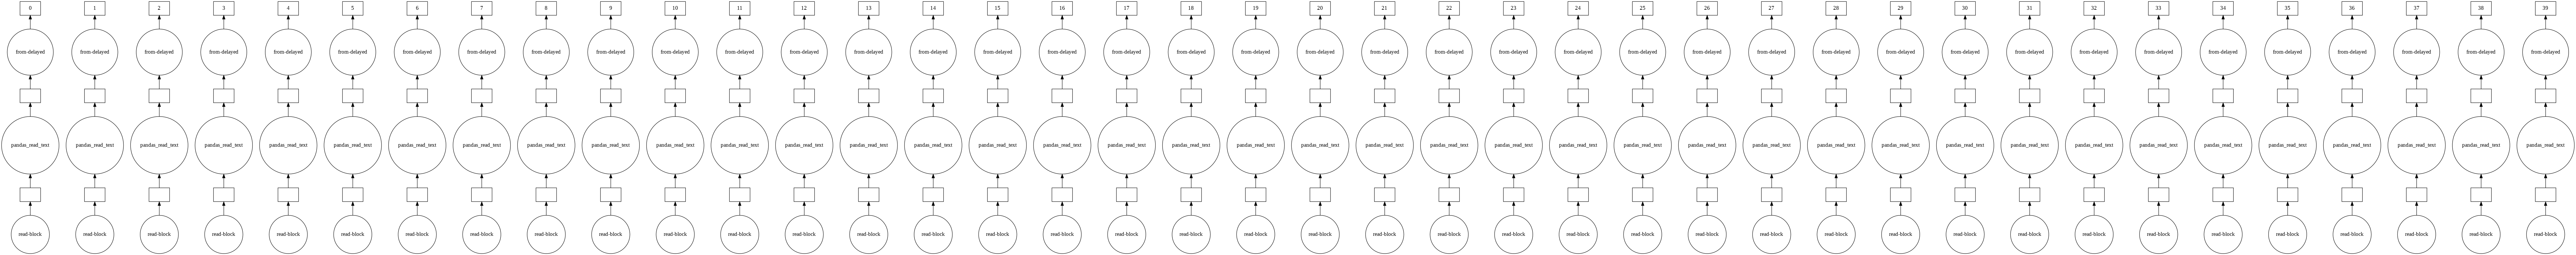

In [6]:
exec_graph = dd.read_csv('trainset_*.csv')
exec_graph.visualize()